# Indentifying risk of Heart Attack in patients - Random Forest model

Development of a classification model using the algorithm **Random Forest** to identify patterns and key characteristics that indicate a high risk of heart attack.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Loading

In [2]:
med_data = pd.read_csv('./dataset/heart.csv', sep=',')

In [3]:
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       342 non-null    int64  
 1   sex       342 non-null    int64  
 2   cp        342 non-null    int64  
 3   trtbps    342 non-null    int64  
 4   chol      342 non-null    int64  
 5   fbs       342 non-null    int64  
 6   restecg   342 non-null    int64  
 7   thalachh  342 non-null    int64  
 8   exng      342 non-null    int64  
 9   oldpeak   342 non-null    float64
 10  slp       342 non-null    int64  
 11  caa       342 non-null    int64  
 12  thall     342 non-null    int64  
 13  output    342 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 37.5 KB


## Data Processing and Analysis

In [4]:
med_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Checking if data is balanced

In [5]:
# Drop Duplicates (if any)
med_data.drop_duplicates()
med_data.groupby(['output'])['output'].count()

output
0    171
1    171
Name: output, dtype: int64

### Spliting features and target
In this step, the data will be splited in the following:
- features: age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall as **x_data**
- target: output as **y_data**

In [6]:
x_data = med_data.drop('output', axis=1).values
y_data = med_data['output'].values

## Balance data

In [7]:
!pip install imblearn


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# UnderSampler to decrease the number of records from the majority class
def data_balance(x_dt, y_dt):
    undersample = RandomUnderSampler(random_state = 42)
    x_under, y_under = undersample.fit_resample(x_dt, y_dt)
    
# TomekLinks to deal with outliers
    tl = TomekLinks(sampling_strategy='all')
    x_under, y_under = tl.fit_resample(x_under, y_under)
    return x_under, y_under

In [9]:
x_balance, y_balance = data_balance(x_data, y_data)

#### Veryfing balance data

In [10]:
print(len(x_balance), len(y_balance))

300 300


In [11]:
import collections
print(collections.Counter(y_balance))

Counter({0: 150, 1: 150})


In [12]:
round(pd.DataFrame(x_balance, columns =['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']).describe(),2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00
mean,54.29,0.70,0.90,132.54,245.34,0.16,0.54,148.86,0.35,1.07,1.37,0.71,2.34
std,9.28,0.46,1.01,17.67,52.00,0.36,0.53,23.88,0.48,1.18,0.62,1.01,0.63
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00
25%,47.00,0.00,0.00,120.00,207.75,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00
50%,55.00,1.00,0.00,130.00,243.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00
75%,60.00,1.00,2.00,140.00,276.25,0.00,1.00,166.00,1.00,1.65,2.00,1.00,3.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00


## Creating Function to split training and test data

In [13]:
def split_train_test(x_balance, y_balance):
    x_train, x_test, y_train, y_test = train_test_split(x_balance,
                                                       y_balance,
                                                       random_state = 42,
                                                       test_size = 0.2)
    return x_train, x_test, y_train, y_test

In [14]:
# Applying function
x_train, x_test, y_train, y_test = split_train_test(x_balance, y_balance)

In [15]:
# X
print("X:", len(x_train), len(x_test))
# Y
print("Y:", len(y_train), len(y_test))

X: 240 60
Y: 240 60


## Creating RandomForest Model

In [16]:
# Create classifier Random Forest
classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=100)

# Create classifier Model
model = classifier.fit(x_train, y_train)

# Make Predictions
y_pred = model.predict(x_test)

### Feautures Importance

In [17]:
pd.DataFrame(model.feature_importances_, columns = ['importance'],
            index = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']).sort_values('importance', ascending = False)

,importance
thall,0.144780
cp,0.139700
thalachh,0.132176
oldpeak,0.128531
age,0.083394
caa,0.080611
chol,0.077381
trtbps,0.064248
exng,0.052134
sex,0.036074


### Calculating Accuracy

In [18]:
print("Accuracy:", y_test.sum()/y_pred.sum())

Accuracy: 0.8611111111111112


## Creating Confusion Matrix

In [19]:
cm = confusion_matrix(y_test, y_pred)

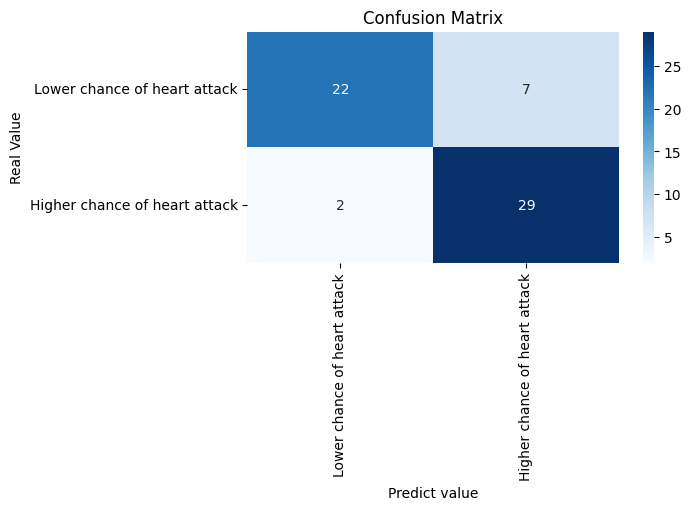

In [20]:
# Define axis names
labels = ['Lower chance of heart attack', 'Higher chance of heart attack']

plt.figure(figsize=(6,3))
sns.heatmap(data=cm,
           annot=True, # show values
           cmap='Blues', # Blue map
           xticklabels=labels,
           yticklabels=labels
           )
plt.xlabel('Predict value')
plt.ylabel('Real Value')
plt.title('Confusion Matrix')
plt.show()

## Reporting from classification

In [21]:
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.81      0.94      0.87        31

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



- What's the correlation between CP (Chest Pain Type) and Output?
- Considering a new patient with the following data, what's the output?
    - Patient: [33, 1, 3, 50, 233, 1, 0, 150, 0, 2.3, 0, 0, 1] 

In [22]:
# Create a DataFrame for x_data
x_df = pd.DataFrame(x_data, columns=med_data.columns[:-1])

# Create a DataFrame for y_data
y_df = pd.DataFrame(y_data, columns=['output'])

# Concat the data and print correlation matrix
pd.DataFrame(pd.concat([x_df, y_df], axis=1), columns =['cp','output']).corr() 

,cp,output
cp,1.000000,0.445482
output,0.445482,1.000000


In [23]:
patient_data = [[33, 1, 3, 50, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
patient_df = pd.DataFrame(patient_data, columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'])

prediction = model.predict(patient_data)
print("Output New Patient:", prediction)

Output New Patient: [1]
